In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class LinearRegression(object):
    def __init__(self, learning_rate, iterations):
        data = np.genfromtxt('../data/data.csv', delimiter=',', skip_header=1)
        self.price = data[:, 1]

        self.kms = data[:, 0]
        self.mean_kms = np.mean(self.kms)
        self.std_kms = np.std(self.kms)
        self.norm_kms = (self.kms - self.mean_kms)/self.std_kms

        self.theta0 = np.mean(self.kms)
        self.theta1 = 0

        self.learning_rate = learning_rate
        self.iterations = iterations

    def estimatePrice(self, theta0, theta1, mileage):
        return theta0 + theta1 * mileage

    def vec_estimatePrice(self, theta0, theta1):
        return np.vectorize(lambda x : self.estimatePrice(theta0, theta1, x))

    def new_thetas(self, theta0, theta1, kms):
        vfunc = self.vec_estimatePrice(theta0, theta1)
        theta0_grad = 2 * np.mean(vfunc(kms) - self.price)
        theta1_grad = 2  * np.mean((vfunc(kms) - self.price) * kms)
        theta0 = theta0 - theta0_grad * self.learning_rate
        theta1 = theta1 - theta1_grad * self.learning_rate
        return theta0, theta1

    def train(self, verbose=True):
        all_theta0 = np.empty((0,1))
        all_theta1 = np.empty((0,1))
        for i in range(self.iterations):
            self.theta0, self.theta1 = self.new_thetas(self.theta0, self.theta1, self.norm_kms)
            all_theta0 = np.append(all_theta0, np.array([[self.theta0]]), axis = 0)
            all_theta1 = np.append(all_theta1, np.array([[self.theta1]]), axis = 0)

        self.all_theta0 = all_theta0 - (self.mean_kms/self.std_kms)
        self.all_theta1 = all_theta1/self.std_kms
        np.savetxt('../output/thetas.txt', [self.all_theta0[-1], self.all_theta1[-1]], delimiter=',')
        
        if verbose == True:
            print("The thetas have been uploaded into ../output/thetas.txt")

    def plot_loss(self):
        self.train(verbose=False)
        predictions = self.all_theta0 + self.all_theta1 * self.kms
        loss = np.average(np.square(predictions - self.price), axis=1)
        plt.plot(loss)
        plt.show()
        
        return loss

    #def plot_linear(self):
    #    self.train(verbose=False)
    #    theta0, theta1 = self.all_theta0[-1], self.all_theta1[-1]
        


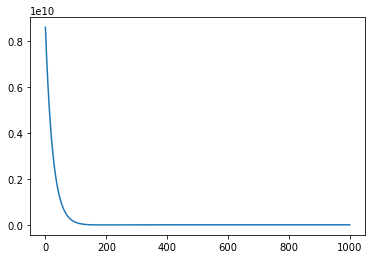

array([  8.61242357e+09,   8.26349866e+09,   7.92855272e+09,
         7.60702894e+09,   7.29839265e+09,   7.00213040e+09,
         6.71774913e+09,   6.44477538e+09,   6.18275449e+09,
         5.93124986e+09,   5.68984225e+09,   5.45812906e+09,
         5.23572371e+09,   5.02225496e+09,   4.81736633e+09,
         4.62071553e+09,   4.43197383e+09,   4.25082562e+09,
         4.07696780e+09,   3.91010933e+09,   3.74997075e+09,
         3.59628371e+09,   3.44879051e+09,   3.30724374e+09,
         3.17140579e+09,   3.04104853e+09,   2.91595289e+09,
         2.79590852e+09,   2.68071345e+09,   2.57017372e+09,
         2.46410311e+09,   2.36232282e+09,   2.26466114e+09,
         2.17095323e+09,   2.08104077e+09,   1.99477178e+09,
         1.91200032e+09,   1.83258627e+09,   1.75639506e+09,
         1.68329753e+09,   1.61316963e+09,   1.54589225e+09,
         1.48135107e+09,   1.41943627e+09,   1.36004244e+09,
         1.30306838e+09,   1.24841689e+09,   1.19599469e+09,
         1.14571218e+09,

In [51]:
LinearRegression(0.01, 1000).plot_loss()

In [53]:
theta0, theta1 = np.genfromtxt('../output/thetas.txt', delimiter=',')

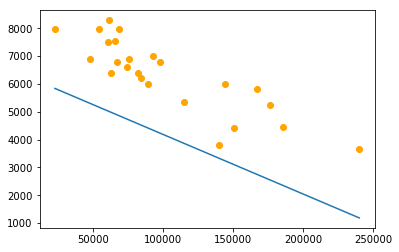

In [54]:
data = np.genfromtxt('../data/data.csv', delimiter=',', skip_header=1)
price = data[:, 1]
kms = data[:, 0]
lim_low = np.min(kms)
lim_high = np.max(kms)

plt.scatter(kms, price, c="orange")
x = np.linspace(lim_low, lim_high, 1000)
plt.plot(x, theta0 + theta1 * x)